<a href="https://colab.research.google.com/github/kh-ops69/ML_NLP/blob/master/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.datasets import load_iris

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-06-11 08:02:32--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  2.17MB/s    in 0.2s    

2023-06-11 08:02:33 (2.17 MB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
spam_df= pd.read_csv(r'spam.csv', encoding='ISO-8859-1')
spam_df.rename(columns={'v1': 'category', 'v2':'text'}, inplace=True)
spam_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
spam_df

,category,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [5]:
pd.set_option('display.max_colwidth', None)

In [ ]:
a=np.where(spam_df.category=='spam')[0]
for i in range(len(a)):
  print(spam_df.iloc[a[i]])

<Axes: >

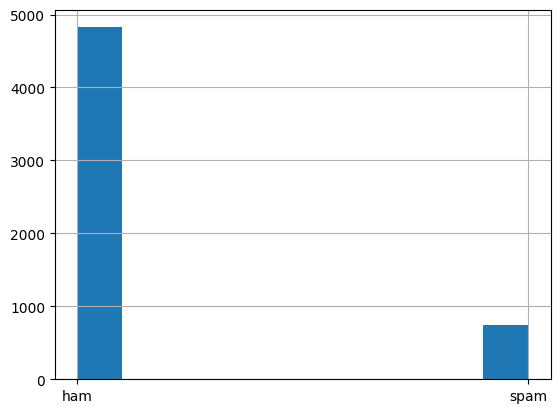

In [9]:
# checking if classes are imbalanced or not
spam_df['category'].hist()

In [16]:
spam_df['labels'] = spam_df.category.map({'ham':0, 'spam':1})
binary_inArray = spam_df.labels.to_numpy()
spam_df

,category,text,labels
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",0
...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",0
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,0


In [52]:
df_train, df_test, true_train, true_test= train_test_split(spam_df.text, binary_inArray, test_size=0.5)

In [53]:
vectorizer = TfidfVectorizer(decode_error= 'ignore')
x_train = vectorizer.fit_transform(df_train).toarray()
x_test = vectorizer.transform(df_test).toarray()

Trying different models to compare accuracies of one model with the other

In [54]:
model = GaussianNB()
model.fit(x_train, true_train)
model.score(x_train, true_train), model.score(x_test, true_test)
gp_train = model.predict(x_train)
gp_test = model.predict(x_test)
f1_score(gp_train, true_train), f1_score(gp_test, true_test)

(0.8708571428571429, 0.7112597547380156)

In [55]:
multinomModel = MultinomialNB()
multinomModel.fit(x_train, true_train)
multinomModel.score(x_train, true_train), multinomModel.score(x_test, true_test)

(0.9694903086862886, 0.949748743718593)

In [56]:
p_train = multinomModel.predict(x_train)
p_test = multinomModel.predict(x_test)
f1_score(p_train, true_train), f1_score(p_test, true_test)

(0.8744460856720827, 0.7635135135135135)

In [61]:
# seeing how SVM model works on iris dataset

data = load_iris()
x = data.data
y = data.target
ir_train, ir_test, iry_train, iry_test = train_test_split(x, y, test_size=0.4, random_state = 35)
svm_model = svm.SVC(probability=True)
svm_model.fit(ir_train, iry_train)
predictions = svm_model.predict(ir_test)
accuracy = accuracy_score(iry_test, predictions)
# accuracy

# checking how much accuracy dips on other dataset as opposed to iris
another_svm_model = svm_model.fit(x_train, true_train)
p = another_svm_model.predict(x_test)
accuracy2 = accuracy_score(true_test, p)
# used indices because of Input variable inconsistent size error


accuracy, accuracy2

(0.95, 0.9759511844938981)

In [63]:
prob_train = another_svm_model.predict_proba(x_train)[:, 1]
prob_test = another_svm_model.predict_proba(x_test)[:, 1]
roc_auc_score(true_train, prob_train), roc_auc_score(true_test, prob_test)

(1.0, 0.9874870162127987)

In [65]:
cm = confusion_matrix(true_test, p)
cm

array([[2418,    2],
       [  65,  301]])

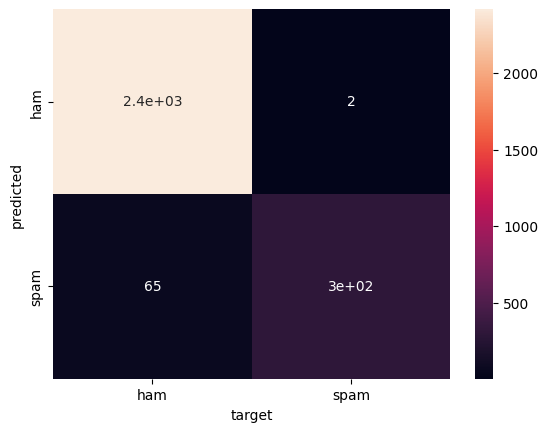

In [67]:
def plot_cm(cm):
  category = ['ham', 'spam']
  cm_df = pd.DataFrame(cm, index=category, columns=category)
  plot = sns.heatmap(cm_df, annot=True)
  plot.set_xlabel("target")
  plot.set_ylabel("predicted")
plot_cm(cm)

In [78]:
words = ''
for message in spam_df[spam_df.labels == 'spam']['text']:
  # message = message.lower()
  print(message)
  # words += message+' '

In [89]:
def visualize_terms(category):
  words = ''
  for message in spam_df[spam_df.category == category]['text']:
    message = message.lower()
    words += message+' '
  wordc = WordCloud(width=600, height=600, colormap='summer').generate(words)
  plt.imshow(wordc)
  plt.axis('off')
  plt.show()

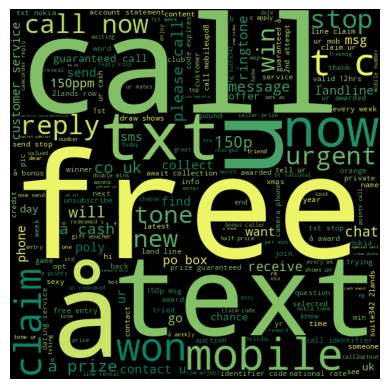

In [90]:
visualize_terms('spam')

In [93]:
# see what we're getting wrong
X = vectorizer.transform(spam_df['text']).toarray()
spam_df['predictions'] = another_svm_model.predict(X)

In [96]:
# finding out what our model has predicted wrongly using the column predictions
# (newly created in the dataset) and using the previously labeled references

wrong_spam_predict = spam_df[(spam_df.predictions == 0) & (spam_df.labels == 1)]['text']
for message in wrong_spam_predict:
  print(message)

England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac Blind Date 4U!: Rodds1 is 21/m from Aberdeen, United Kingdom. Check Him out http://img. sms. ac/W/icmb3cktz8r7!-4 no Blind Dates send HIDE
100 dating service cal;l 09064012103 box334sk38ch
Send a logo 2 ur lover - 2 names joined by a heart. Txt LOVE NAME1 NAME2 MOBNO eg LOVE ADAM EVE 07123456789 to 87077 Yahoo! POBox36504W45WQ TxtNO 4 no ads 150p
You will recieve your tone within the next 24hrs. For Terms and conditions please see Channel U Teletext Pg 750
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds 